<a href="https://colab.research.google.com/github/Manu-DION/VL_CI_2021/blob/main/VL_CdI_2021_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 
## 02 - Python and Pandas: Summarizing Voter List Data (Colab)
<p class="lead">
Michelle Brown Notes v 6.0<br>
 Uses a scrabled/anonomyize versio of Voter list (one csv file) 
 

In this notebook we are going to be combining files into one large file--a voter list of more than 3 million records. We will summarize the data, and make a simple histogram. We'll also go over how to save subsets of the data.[link text](https://)

# Outline

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Import Libraries](#imp)
- [Read in the first file](#read1)
- [Checking missing values](#missing)
- [Snapshot of histograms (plots)](#plots)
- [Duplicate and unique names](#dups)
- [Summarizing at a higher level](#sumhigh)
- [Create a dataset at the polling station level](#pslevel)
- [Make a histogram](#histo)
- [Save the polling station level dataset](#save)

<!-- /MarkdownTOC -->

<a name="imp"></a>
# Importing libraries

Again we import the analysis module called pandas as a variable called 'pd' so we can use it's associated methods. But we are also going to import some other libraries that we'll use later to make inline plots. 

In [ ]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import datetime

<a name="read1"></a>
# Read in first file of the Voter List

(Colab) Get the file and put them here in our Colab environment. (After running the code, you can click the folder icon on the left and then see the file listed)


In [ ]:
! wget "https://www.dropbox.com/s/sb1zzwtg35hs0dn/Liste%20%C3%A9lectorale%20d%C3%A9finitive%202021.CSV"

--2022-09-15 13:23:27--  https://www.dropbox.com/s/sb1zzwtg35hs0dn/Liste%20%C3%A9lectorale%20d%C3%A9finitive%202021.CSV
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/sb1zzwtg35hs0dn/Liste%20%C3%A9lectorale%20d%C3%A9finitive%202021.CSV [following]
--2022-09-15 13:23:27--  https://www.dropbox.com/s/raw/sb1zzwtg35hs0dn/Liste%20%C3%A9lectorale%20d%C3%A9finitive%202021.CSV
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7bafc6a171cc4e19448e948f73.dl.dropboxusercontent.com/cd/0/inline/Bs-kM2FI2RslxhhW_foMPwAq1_fPxbfeM_WyceXn3OKoSXIf-LFrw7MXefKalq5eQhB_ruaTJ1lS82dGNd4DzBdflLqZIOG6qcgyl-T0fbUVQzA-mWPTDEEl9_JOj_-CgHmbTRMN0ye7thBh65A65DEsreBvLzj7DpOWaxYcrIIKHg/file# [following]
--2022-09-15 13:23:27--  https://uc7bafc6a171cc4e19448e948f

In [ ]:
file_path =  "/content/Liste électorale définitive 2021.CSV"

We read in the csv file noting that it is separated by ";" and store it as dataframe called df and see it's shape (rows and columns)

We use the option "index_col=False" so that pandas does not take the Numero formulaire and try to assign that as the internal index (which we do not want)

In [ ]:
df = pd.read_csv(file_path, sep=";", index_col=False)
# df = pd.read_csv(file_path, sep=";", on_bad_lines='skip')

In [ ]:
df.shape

(7495082, 28)

Let's create a variablet ttlrec which will hold the total number of records (voters) so we can reference it later when looking at duplicates

In [ ]:
ttlrec = df.shape[0]
print(ttlrec)

7495082


In [ ]:
df.head(100)

,Numero Formulaire 2021,Numero Electeur,Code Departement,Libelle Departement,Code Sous-Prefecture,Libelle Sous-Prefecture,Code Commune,Libelle Commune,Code Lieu de Vote,Libelle Lieu de Vote,...,Prenoms du Pere,Date de Naissance du Pere,Lieu de Naissance du Pere,Nom de la Mere,Prenoms de la Mere,Date de Naissance de la Mere,Lieu de Naissance de la Mere,Adresse Physique,Adresse Postale,Profession
0,1.065192e+09,V 0065 2924 53,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,ALLECHI MARCELLIN,30/12/1939,AKEIKOI ANYAMA,EKENI,CHADON,01/01/1951,GRAND AKOUDZIN,AGBOVILLE ADAHOU EXTENSION,BP 512 AGBOVILLE,INSTITUTRICE
1,NaN,V 0204 5947 41,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,OMO NOEL,NaN,KOKO,GNAMIEN,ABOUHO LIDIVINE,NaN,NaN,ADAHOU AGBOVILLE,BP,ELEVE
2,NaN,V 0095 5498 80,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,YAYA SYLVESTRE,01/01/1951,GRAND-ALEPE,AKPOUI,CHIA,14/07/1959,GRAND-ALEPE,ADAHOU EXTENSION,05 BP 2663 ABIDJAN,PROFESSEUR
3,1.065195e+09,V 0213 5607 77,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,KOBENAN,NaN,NaN,YAWA,BUO MADELEINE,01/01/1962,GOUMERE,AGBOVILLE ADAHOU EXTENTION,BP,ELEVE
4,NaN,V 0081 6013 67,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,AHOU SERAPHIN,30/12/1964,ATTINGUIE ANYAMA,OCHO,N'GBESSO ROSALIE,01/01/1900,AGBOVILLE,ADAHOU EXTENSION,BP,ELEVE FOOTBALEUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,V 0101 3551 86,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,KOUAKOU,01/01/1900,INCONNU,KOUAKOU,ASSIE,01/01/1959,ARRAH,ADAHOU EXTENSION,BP,MENAGERE
96,NaN,V 0094 5530 26,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,AKA,01/01/1900,DIDIEVI,BASSERI,ADJOUA,01/01/1900,AGBOVILLE,ADAHOU EXTENSION,BP,MENAGERE
97,NaN,V 0039 1912 34,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,KOUASSI,01/01/1900,ANDE,YAO,AFFOUE,01/01/1900,BOUAKE,AGBOVILLE ADAHOU EXTENSION,BP,COUTURIERE
98,NaN,V 0095 5479 14,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,AKA,01/01/1900,AGBOVILLE,ALLA,MAH HENRIETTE,01/01/1928,ANOUMAMBA M'BATTO,ADAHOU EXTENSION,BP 870 AGBOVILLE,COMMERCANTE


In [ ]:
df.tail()

,Numero Formulaire 2021,Numero Electeur,Code Departement,Libelle Departement,Code Sous-Prefecture,Libelle Sous-Prefecture,Code Commune,Libelle Commune,Code Lieu de Vote,Libelle Lieu de Vote,...,Prenoms du Pere,Date de Naissance du Pere,Lieu de Naissance du Pere,Nom de la Mere,Prenoms de la Mere,Date de Naissance de la Mere,Lieu de Naissance de la Mere,Adresse Physique,Adresse Postale,Profession
7495077,1.065824e+09,V 0102 0582 59,999,DIASPORA,3,EUROPE,17,ALLEMAGNE,3,COLOGNE,...,GEORGES,01/01/1919,DJATEGNOA,NAKOU,NAKPO DJOGBA,01/01/1925,DOBOUO,GEORG-GROSSER-STRASSE 1 50321,BP BRUEHL,COMPTABLE
7495078,1.065827e+09,V 0026 5371 73,999,DIASPORA,3,EUROPE,17,ALLEMAGNE,3,COLOGNE,...,BI N'GUESSAN,26/09/1955,FERKESSEDOUGOU,YA,LOU KIELA ANGELE,01/01/1965,BOUAFLE,MASTWEG 88 42349,BP WUPPERTAL,ETUDIANT
7495079,1.065825e+09,V 0102 0499 61,999,DIASPORA,3,EUROPE,17,ALLEMAGNE,3,COLOGNE,...,ALBERT,01/01/1913,TIBOUO,YABO,MADELEINE,01/01/1900,NaN,AM ALTEN STELLWERK 54 50733,BP KOELN,ENTREPRENEUR
7495080,1.065827e+09,V 0203 9534 13,999,DIASPORA,3,EUROPE,17,ALLEMAGNE,3,COLOGNE,...,ZIRIKI,06/10/1962,ISSIA,YORO,MENEHY CHANTAL,01/01/1972,SAIOUA,KLEINE RIEDSTRASSE 6C 68168,BP MANNHEIM,ETUDIANT
7495081,1.065823e+09,V 0216 3083 94,999,DIASPORA,3,EUROPE,17,ALLEMAGNE,3,COLOGNE,...,ZADIMY MARC FIDELE,26/04/1972,NaN,DJEDJE,ANNE MARIE,01/01/1971,NaN,ADALBER-STIFFE STRASSE 24 71638,BP LUDWIGSBURG,ETUDIANTE


In [ ]:
df.columns

Index(['Numero Formulaire 2021', 'Numero Electeur', 'Code Departement',
       'Libelle Departement', 'Code Sous-Prefecture',
       'Libelle Sous-Prefecture', 'Code Commune', 'Libelle Commune',
       'Code Lieu de Vote', 'Libelle Lieu de Vote', 'Bureau de vote',
       'Nom/Nom de Jeune Fille', 'Nom d'Epouse', 'Prenoms', 'Sexe',
       'Date de Naissance', 'Lieu de Naissance', 'Nom du Pere',
       'Prenoms du Pere', 'Date de Naissance du Pere',
       'Lieu de Naissance du Pere', 'Nom de la Mere', 'Prenoms de la Mere',
       'Date de Naissance de la Mere', 'Lieu de Naissance de la Mere',
       'Adresse Physique', 'Adresse Postale', 'Profession'],
      dtype='object')

# List of the variables 

*   ['Numero Formulaire 2021;  Number of Form if registered in 2020
*   "Numero Electeur";     **Voter Number** 
*   "Code Departement";
*   "Libelle Departement";
*   "Code Sous-Prefecture";
*   "Libelle Sous-Prefecture";
*   "Code Commune";
*   "Libelle Commune";
*   "Code Lieu de Vote";
*   "Libelle Lieu de Vote";
*   "Bureau de vote";   
*   "Nom/Nom de Jeune Fille";  **LAST  NAMES** (maiden)
*   "Nom d'Epouse";    Name of Spouse 
*   "Prenoms";   **FIRST Names**
*   "Sexe";
*   "Date de Naissance";   **Date of Birth**
*   "Lieu de Naissance";  Place of Birth 
*   "Nom du Pere";    Father Last name 
*   "Prenoms du Pere";  Father first name
*   "Date de Naissance du Pere"; 
*   "Lieu de Naissance du Pere";
*   "Nom de la Mere";
*   "Prenoms de la Mere";
*   "Date de Naissance de la Mere";
*   "Lieu de Naissance de la Mere";
*   "Adresse Physique"; Physical Address
*   "Adresse Postale";  Postal address 
*   "Profession"'



<a name="missing"></a>
# Checking the missing values on the complete dataset

This will give use the number of missing (null) values for each column

In [ ]:
print(df.isnull().sum())
print(f"Total records is {ttlrec}")

Numero Formulaire 2021          5845313
Numero Electeur                       0
Code Departement                      0
Libelle Departement                   0
Code Sous-Prefecture                  0
Libelle Sous-Prefecture               0
Code Commune                          0
Libelle Commune                       0
Code Lieu de Vote                     0
Libelle Lieu de Vote                  0
Bureau de vote                        0
Nom/Nom de Jeune Fille               67
Nom d'Epouse                    7284926
Prenoms                              65
Sexe                                  0
Date de Naissance                     0
Lieu de Naissance                  3153
Nom du Pere                          95
Prenoms du Pere                  222512
Date de Naissance du Pere        843843
Lieu de Naissance du Pere        946177
Nom de la Mere                      191
Prenoms de la Mere               218522
Date de Naissance de la Mere     915303
Lieu de Naissance de la Mere    1060225


In [ ]:
7284926 / ttlrec

0.9719608137709501

Question: do the 67 nulls in Nom overlap with the 65 in Prenom?


Filter by the 67 nulls in 'Nom/Nom de Jeune Fille'

In [ ]:
df['Nom/Nom de Jeune Fille']

0                 ABAH
1                 ABBA
2                 ABBE
3                  ABO
4                 ABOH
              ...     
7495077    ZAGBALLOUNE
7495078            ZAN
7495079         ZIKEHI
7495080         ZIRIHI
7495081           ZOPO
Name: Nom/Nom de Jeune Fille, Length: 7495082, dtype: object

In [ ]:
nomnulldf = df[df['Nom/Nom de Jeune Fille'].isna()]

In [ ]:
nomnulldf.head(67)

Take the new dataframe of null noms and filter to see teh records where the Prenoms is also null 

In [ ]:
nomnulldf[nomnulldf['Prenoms'].isna()]

In [ ]:
nomnulldf['Prenoms']

So the null Prenoms do NOT overlap with the null Noms 

This will give us a count of non-null values for each column (opposite fo null) 


## Let's look at entries for 'Adresse Physique'

In [ ]:
df['Adresse Physique']

## Let's look at Adresse Postale 

In [ ]:
df['Adresse Postale']

In [ ]:
df['Adresse Postale-trim'] = df['Adresse Postale'].str.strip()

Let's create a new column for Adresse Postale where the whitespace is trimmed from the beginning and the end (removed) so we can them look for just "BP"

In [ ]:
df[df['Adresse Postale-trim'] == "BP"]

Looking at the null/missing for Nom de la Mere

we will filter down to the records that are missing for that adn set it as it's own dataframe

In [ ]:
nommeredf = df[df['Nom de la Mere'].isna()]

In [ ]:
nommeredf.shape

In [ ]:
nommeredf.head(100)

In [ ]:
df.count()

<a name="dups"></a>
#  Duplicate and unique records</h1>
Let's check for the number of unique entries in specific column like 'Numero Electeur'

In [ ]:
print("Number of unique is: ")
print(df['Numero Electeur'].nunique())
print("Total records is :", ttlrec)

Number of unique is: 
7495082
Total records is : 7495082


In [ ]:
df['Numero Electeur'].unique()

array(['V 0065 2924 53', 'V 0204 5947 41', 'V 0095 5498 80', ...,
       'V 0102 0499 61', 'V 0203 9534 13', 'V 0216 3083 94'], dtype=object)

In [ ]:
df['fil-prenom'] = df['Nom/Nom de Jeune Fille'] + '-' + df['Prenoms'] 

Now let's get a count of the unique in the column

In [ ]:
df['fil-prenom'].nunique()

4339177

Let's preview the unique in the column 

In [ ]:
df['fil-prenom'].unique()

array(['ABAH-MARIE EDWIGE', 'ABBA-ATTOWLA HERMANN CEDRICK',
       'ABBE-YAYA CAROLINE', ..., 'ZIKEHI-HILAIRE',
       'ZIRIHI-KESSIE CYRILLE', "ZOPO-LOU N'GUESSAN MOREL"], dtype=object)

Let's see how many unique with concatenating 3 variables 

In [ ]:
df['fil_pre_dob'] = df['Nom/Nom de Jeune Fille'] + '-' + df['Prenoms'] + '-' + df['Date de Naissance'].astype(str)

In [ ]:
df['fil_pre_dob'].nunique()

7111192

The new variable has 7,111,192 unique records 

Now let's examine Bureau 

In [ ]:
df['Bureau de vote'].nunique()

68

Creating a new colum with unique ID for each Bureau de vote "b-id"

Code Departement                  int64
Code Sous-Prefecture              int64
Code Commune                      int64
Code Lieu de Vote                 int64
Bureau de vote                    int64

In [ ]:
df['b-id'] = df['Code Departement'].astype(str) +"-"+ df['Code Sous-Prefecture'].astype(str) + "-" + df['Code Lieu de Vote'].astype(str) + "-" +  df["Bureau de vote"].astype(str)

In [ ]:
df['b-id'].nunique()

16874

Number of unique Department codes 

In [ ]:
df['Code Departement'].nunique()

109

In [ ]:
df['Libelle Departement'].nunique()

109

In [ ]:
df['Code Sous-Prefecture'].nunique()

23

In [ ]:
df['Libelle Sous-Prefecture'].nunique()

507

The number of unique 'Name of Prefecture' makes more sense at 507

In [ ]:
df['Code Commune'].nunique()

18

In [ ]:
df['Libelle Commune'].nunique()

538

In [ ]:
df['Code Lieu de Vote'].nunique()

173

But that code seems too few 

In [ ]:
df['Code Lieu de Vote'].head()

0    1
1    1
2    1
3    1
4    1
Name: Code Lieu de Vote, dtype: int64

In [ ]:
df['Libelle Lieu de Vote'].nunique()

10077

In [ ]:
df['Libelle Lieu de Vote'].head(20)

0     G S ADAHOU EXTENTION 1- 2
1     G S ADAHOU EXTENTION 1- 2
2     G S ADAHOU EXTENTION 1- 2
3     G S ADAHOU EXTENTION 1- 2
4     G S ADAHOU EXTENTION 1- 2
5     G S ADAHOU EXTENTION 1- 2
6     G S ADAHOU EXTENTION 1- 2
7     G S ADAHOU EXTENTION 1- 2
8     G S ADAHOU EXTENTION 1- 2
9     G S ADAHOU EXTENTION 1- 2
10    G S ADAHOU EXTENTION 1- 2
11    G S ADAHOU EXTENTION 1- 2
12    G S ADAHOU EXTENTION 1- 2
13    G S ADAHOU EXTENTION 1- 2
14    G S ADAHOU EXTENTION 1- 2
15    G S ADAHOU EXTENTION 1- 2
16    G S ADAHOU EXTENTION 1- 2
17    G S ADAHOU EXTENTION 1- 2
18    G S ADAHOU EXTENTION 1- 2
19    G S ADAHOU EXTENTION 1- 2
Name: Libelle Lieu de Vote, dtype: object

In [ ]:
df["Bureau de vote"].nunique()

68

re-assign to the variable 'b-id' using Libelle Sous-Prefecture plus Libelle Lieu de Vote plus Bureau de vote

In [ ]:
df['b-id'] = df['Libelle Sous-Prefecture'] + "-" + df['Libelle Lieu de Vote'] + "-" +  df["Bureau de vote"].astype(str)

In [ ]:
df['b-id'].nunique()

22322

In [ ]:
df['b-id'] = df['Code Departement'].astype(str) + "-"+ df['Libelle Commune'] + "-" + df['Libelle Sous-Prefecture'] + "-" + df['Libelle Lieu de Vote'] + "-" +  df["Bureau de vote"].astype(str)

In [ ]:
df['b-id'].nunique()

22370

We hoped for 22381 bureaus but got to 22370. So now we save a list of those so we can compare it later. 

# Saving Bureau list 

In [ ]:
bcount = df.groupby('b-id').size(); bcount

b-id
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO I-1     402
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO I-2     400
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO I-3     400
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO II-1    416
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO II-2    415
                                             ... 
999-TUNISIE-AFRIQUE-TUNIS-4                   408
999-TUNISIE-AFRIQUE-TUNIS-5                   408
999-TUNISIE-AFRIQUE-TUNIS-6                   408
999-TUNISIE-AFRIQUE-TUNIS-7                   408
999-TUNISIE-AFRIQUE-TUNIS-8                   408
Length: 22370, dtype: int64

In [ ]:
bcount = bcount.to_frame().reset_index()

Let's view the names of our columns

In [ ]:
bcount.columns

Index(['b-id', 0], dtype='object')

Rename teh column called 0 to numVoters 

In [ ]:
bcount.rename(columns={0: 'numVoters'}, inplace=True)

In [ ]:
bcount.describe()

,numVoters
count,22370.0
mean,335.1
std,103.1
min,22.0
25%,272.0
50%,376.0
75%,416.0
max,789.0


In [ ]:
bcount.to_csv('Bureau_list_withnVoters_semicolon.csv', sep=';', encoding='utf-8', index=False)

Using the left 

# Dealing with Date of birth 

We have the Date of Birth DoB variable. Let's check it's data type

In [ ]:
df.dtypes

Numero Formulaire 2021                 float64
Numero Electeur                         object
Code Departement                         int64
Libelle Departement                     object
Code Sous-Prefecture                     int64
Libelle Sous-Prefecture                 object
Code Commune                             int64
Libelle Commune                         object
Code Lieu de Vote                        int64
Libelle Lieu de Vote                    object
Bureau de vote                           int64
Nom/Nom de Jeune Fille                  object
Nom d'Epouse                            object
Prenoms                                 object
Sexe                                    object
Date de Naissance               datetime64[ns]
Lieu de Naissance                       object
Nom du Pere                             object
Prenoms du Pere                         object
Date de Naissance du Pere       datetime64[ns]
Lieu de Naissance du Pere               object
Nom de la Mer

In [ ]:
df.head(20)

,Numero Formulaire 2021,Numero Electeur,Code Departement,Libelle Departement,Code Sous-Prefecture,Libelle Sous-Prefecture,Code Commune,Libelle Commune,Code Lieu de Vote,Libelle Lieu de Vote,...,Date de Naissance du Pere,Lieu de Naissance du Pere,Nom de la Mere,Prenoms de la Mere,Date de Naissance de la Mere,Lieu de Naissance de la Mere,Adresse Physique,Adresse Postale,Profession,fil-prenom
0,1.065192e+09,V 0065 2924 53,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,30/12/1939,AKEIKOI ANYAMA,EKENI,CHADON,01/01/1951,GRAND AKOUDZIN,AGBOVILLE ADAHOU EXTENSION,BP 512 AGBOVILLE,INSTITUTRICE,ABAH-MARIE EDWIGE
1,NaN,V 0204 5947 41,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,NaN,KOKO,GNAMIEN,ABOUHO LIDIVINE,NaN,NaN,ADAHOU AGBOVILLE,BP,ELEVE,ABBA-ATTOWLA HERMANN CEDRICK
2,NaN,V 0095 5498 80,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,01/01/1951,GRAND-ALEPE,AKPOUI,CHIA,14/07/1959,GRAND-ALEPE,ADAHOU EXTENSION,05 BP 2663 ABIDJAN,PROFESSEUR,ABBE-YAYA CAROLINE
3,1.065195e+09,V 0213 5607 77,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,NaN,NaN,YAWA,BUO MADELEINE,01/01/1962,GOUMERE,AGBOVILLE ADAHOU EXTENTION,BP,ELEVE,ABO-YAO SYLVAIN
4,NaN,V 0081 6013 67,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,30/12/1964,ATTINGUIE ANYAMA,OCHO,N'GBESSO ROSALIE,01/01/1900,AGBOVILLE,ADAHOU EXTENSION,BP,ELEVE FOOTBALEUR,ABOH-TETCHI SERGE ANO
5,NaN,V 0084 5582 20,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,01/01/1935,AZAGUIE,DOFFOU,ODJO,01/01/1940,AGBOVILLE,ADAHOU EXTENSION,BP,CHAUFFEUR,ABOLE-ABOLE FRANK
6,1.065192e+09,V 0212 6082 30,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,NaN,NaN,ABOU,ANGROA DORETHEE,NaN,NaN,ADAHOU EXTENTION,BP,ELEVE,ABOU-GNANKOUE MARLYSE FORTUNEE
7,1.065192e+09,V 0078 5898 36,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,01/01/1900,AKOYATE,OBROU,ASSRE JEANNETTE,01/01/1900,AKOYATE,ADAHOU EXTENTION,BP 37 ALEPE,PLANTEUR,ABOU-MESSI JONAS
8,NaN,V 0066 2030 41,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,01/01/1947,INCONNU,BROU,SOPIE ELISABETH,01/01/1938,AKOUPE,ADAHOU EXTENSION,BP,EDUCATEUR,ABOUA-CLAUDE ANICET
9,1.065195e+09,V 0027 4067 84,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,14/06/1953,AFFERY,KISSIEDOU,ADJA LOUISE,20/02/1956,AFFERY,AGBOVILLE ADAHOU EXTENTION,BP,RESTAURATRICE,ACHI-ACHIBAH LUCIENNE


Computationally intense but will infer the datetime format 

In [ ]:
df['Date de Naissance'] = pd.to_datetime(df['Date de Naissance'], infer_datetime_format=True)

Let's check the data types again and make sure it's now datetime

In [ ]:
df.dtypes

Numero Formulaire 2021                 float64
Numero Electeur                         object
Code Departement                         int64
Libelle Departement                     object
Code Sous-Prefecture                     int64
Libelle Sous-Prefecture                 object
Code Commune                             int64
Libelle Commune                         object
Code Lieu de Vote                        int64
Libelle Lieu de Vote                    object
Bureau de vote                           int64
Nom/Nom de Jeune Fille                  object
Nom d'Epouse                            object
Prenoms                                 object
Sexe                                    object
Date de Naissance               datetime64[ns]
Lieu de Naissance                       object
Nom du Pere                             object
Prenoms du Pere                         object
Date de Naissance du Pere       datetime64[ns]
Lieu de Naissance du Pere               object
Nom de la Mer

And now let's repeat for Date de Naissance du Pere & Date de Naissance de la Mere

In [ ]:
df['Date de Naissance du Pere'] = pd.to_datetime(df['Date de Naissance du Pere'], infer_datetime_format=True)

In [ ]:
df['Date de Naissance de la Mere'] = pd.to_datetime(df['Date de Naissance de la Mere'], infer_datetime_format=True)

Let's create a new variable called age that take the difference in months and years between the date of birth and now/ today  

In [ ]:
d2020 = pd.to_datetime('31/10/2020')

In [ ]:
df['Age2020'] = (d2020.year - df['Date de Naissance'].dt.year) - ((d2020.month - df['Date de Naissance'].dt.month) < 0)

In [ ]:
df.head()

,Numero Formulaire 2021,Numero Electeur,Code Departement,Libelle Departement,Code Sous-Prefecture,Libelle Sous-Prefecture,Code Commune,Libelle Commune,Code Lieu de Vote,Libelle Lieu de Vote,...,Date de Naissance de la Mere,Lieu de Naissance de la Mere,Adresse Physique,Adresse Postale,Profession,fil-prenom,Age-20,Age2020,fil_pre_dob,b-id
0,1065192259.0,V 0065 2924 53,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,1951-01-01,GRAND AKOUDZIN,AGBOVILLE ADAHOU EXTENSION,BP 512 AGBOVILLE,INSTITUTRICE,ABAH-MARIE EDWIGE,45,45,ABAH-MARIE EDWIGE-1975-10-10,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1
1,NaN,V 0204 5947 41,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,NaT,NaN,ADAHOU AGBOVILLE,BP,ELEVE,ABBA-ATTOWLA HERMANN CEDRICK,24,24,ABBA-ATTOWLA HERMANN CEDRICK-1996-10-19,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1
2,NaN,V 0095 5498 80,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,1959-07-14,GRAND-ALEPE,ADAHOU EXTENSION,05 BP 2663 ABIDJAN,PROFESSEUR,ABBE-YAYA CAROLINE,39,39,ABBE-YAYA CAROLINE-1980-12-29,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1
3,1065195182.0,V 0213 5607 77,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,1962-01-01,GOUMERE,AGBOVILLE ADAHOU EXTENTION,BP,ELEVE,ABO-YAO SYLVAIN,20,20,ABO-YAO SYLVAIN-2000-04-05,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1
4,NaN,V 0081 6013 67,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,1900-01-01,AGBOVILLE,ADAHOU EXTENSION,BP,ELEVE FOOTBALEUR,ABOH-TETCHI SERGE ANO,29,29,ABOH-TETCHI SERGE ANO-1990-12-30,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1


In [ ]:
df["Age2020"].describe()

count   7495082.0
mean         42.9
std          14.7
min           0.0
25%          32.0
50%          40.0
75%          52.0
max         170.0
Name: Age2020, dtype: float64

Let's change display option so it does not show as scientific notation

In [ ]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [ ]:
df["Age2020"].describe()

KeyError: ignored

In [ ]:
# to reset the display values to default, uncomment below
#pd.reset_option("all") 

<a name="plots"></a>
# Snapshot of histograms (plots)

Let's make a simple histogram of Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b3c59390>]],
      dtype=object)

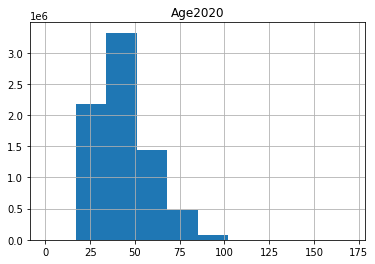

In [ ]:
df.hist('Age2020')

Let's say we want more bins so we get a better sense of the distribution. We can specify the number of bins:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff631500650>]],
      dtype=object)

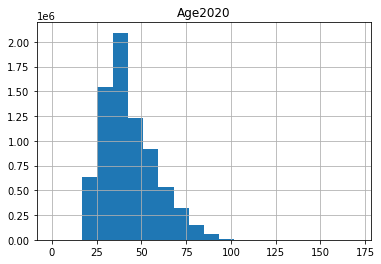

In [ ]:
df.hist(column = 'Age2020', bins = 20)

The default options for plots are pretty ugly. This code will applying one of the styles available called ggplot to all of our next plots.  It incorporates many of the best practices for presenting data and focus on simplicity. It is modeled after the plotting system in the R language. 

In [ ]:
plt.style.use('ggplot')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff67015c110>]],
      dtype=object)

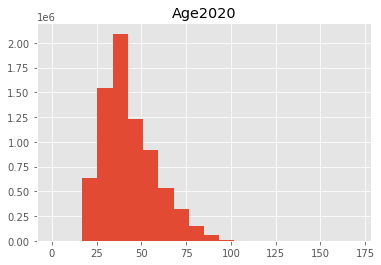

In [ ]:
df.hist(column = 'Age2020', bins = 20)

In [ ]:
plt.style.use('seaborn-deep')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6760e16d0>]],
      dtype=object)

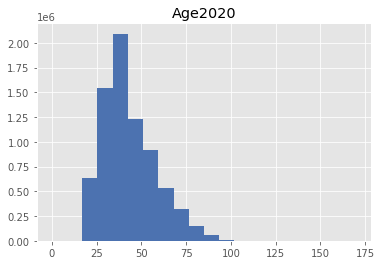

In [ ]:
df.hist(column = 'Age2020', bins = 20)

Or if you want to apply the style to just the one plot (and not all of them):

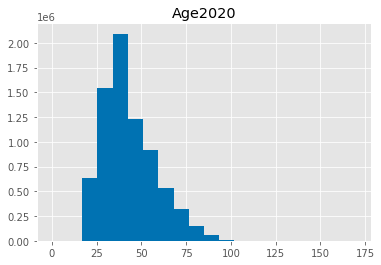

In [ ]:
with plt.style.context('seaborn-colorblind'):  #add this line 
    df.hist(column = 'Age2020', bins = 20)

You can also change the title to a specific text and style it (last line below) using the plt.title method and parameters: 

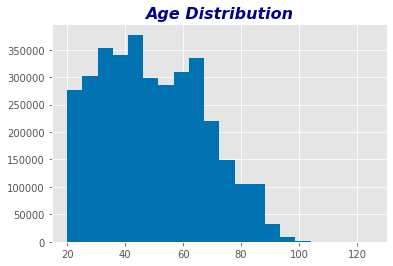

In [ ]:
with plt.style.context('seaborn-colorblind'):  
    df.hist(column = 'Age2020', bins = 20)
    plt.title("Age 92020) Distribution", fontname='Arial', fontsize=16, fontstyle='italic', fontweight='bold', color='darkblue')

If you want to see the styles available, run the code below. Here is a gallery of the styles: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Age 95 and older 
Let's create a new variable for 95 and over that will mark a 1 if Age is more than or equal to 60 

In [ ]:
df['95_over'] = df['Age2020'].apply(lambda x: 1 if x >= 95 else 0)
df.head()

,Numero Formulaire 2021,Numero Electeur,Code Departement,Libelle Departement,Code Sous-Prefecture,Libelle Sous-Prefecture,Code Commune,Libelle Commune,Code Lieu de Vote,Libelle Lieu de Vote,...,Lieu de Naissance de la Mere,Adresse Physique,Adresse Postale,Profession,fil-prenom,Age-20,Age2020,fil_pre_dob,b-id,95_over
0,1065192259.0,V 0065 2924 53,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,GRAND AKOUDZIN,AGBOVILLE ADAHOU EXTENSION,BP 512 AGBOVILLE,INSTITUTRICE,ABAH-MARIE EDWIGE,45,45,ABAH-MARIE EDWIGE-1975-10-10,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1,0
1,NaN,V 0204 5947 41,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,NaN,ADAHOU AGBOVILLE,BP,ELEVE,ABBA-ATTOWLA HERMANN CEDRICK,24,24,ABBA-ATTOWLA HERMANN CEDRICK-1996-10-19,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1,0
2,NaN,V 0095 5498 80,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,GRAND-ALEPE,ADAHOU EXTENSION,05 BP 2663 ABIDJAN,PROFESSEUR,ABBE-YAYA CAROLINE,39,39,ABBE-YAYA CAROLINE-1980-12-29,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1,0
3,1065195182.0,V 0213 5607 77,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,GOUMERE,AGBOVILLE ADAHOU EXTENTION,BP,ELEVE,ABO-YAO SYLVAIN,20,20,ABO-YAO SYLVAIN-2000-04-05,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1,0
4,NaN,V 0081 6013 67,1,AGBOVILLE,1,AGBOVILLE,1,AGBOVILLE,1,G S ADAHOU EXTENTION 1- 2,...,AGBOVILLE,ADAHOU EXTENSION,BP,ELEVE FOOTBALEUR,ABOH-TETCHI SERGE ANO,29,29,ABOH-TETCHI SERGE ANO-1990-12-30,1-AGBOVILLE-AGBOVILLE-G S ADAHOU EXTENTION 1- 2-1,0


In [ ]:
df.describe()

,Numero Formulaire 2021,Code Departement,Code Sous-Prefecture,Code Commune,Code Lieu de Vote,Bureau de vote,Age-20,Age2020,95_over
count,1649769.0,7495082.0,7495082.0,7495082.0,7495082.0,7495082.0,7495082.0,7495082.0,7495082.0
mean,1073101722.1,57.6,3.0,34.2,22.1,2.9,42.9,42.9,0.0
std,36088587.6,111.7,2.7,44.8,30.8,3.3,14.7,14.7,0.0
min,1001648208.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
25%,1064775828.0,22.0,1.0,1.0,4.0,1.0,32.0,32.0,0.0
50%,1072937065.0,35.0,2.0,4.0,10.0,2.0,40.0,40.0,0.0
75%,1081762986.0,71.0,4.0,98.0,26.0,4.0,52.0,52.0,0.0
max,9900300500.0,999.0,23.0,98.0,173.0,68.0,170.0,170.0,1.0


Let's look at the counts

In [ ]:
age95counts = df.groupby('95_over').size(); age95counts

95_over
0    7486007
1       9075
dtype: int64

Let's calcluate what percetnate those age 95 and over are out of the total 

In [ ]:
9075 / (9075 + 7486007)

0.0012107939579580316

In [ ]:
pd.pivot_table(df,index=["Code Departement"],values=["95_over"],aggfunc=np.sum)

,95_over
Code Departement,
1,174
2,41
3,64
4,29
5,48
...,...
105,22
106,14
107,10


In [ ]:
df_sub =df[["Code Departement","95_over"]].groupby("Code Departement").sum()
df_sub

,95_over
Code Departement,
1,174
2,41
3,64
4,29
5,48
...,...
105,22
106,14
107,10


create a new colume called voter and just fill it with one so we can add it into our sums and use to compare with 90_over 

In [ ]:
df['voter'] = 1

In [ ]:
#pivot table way
pd.pivot_table(df,index=["Code Departement"],values=["95_over","voter"],aggfunc=np.sum)

,95_over,voter
Code Departement,,
1,174,118704
2,41,33342
3,64,59070
4,29,24016
5,48,19857
...,...,...
105,22,10809
106,14,9192
107,10,12682


The same by doing it the 'groupby' way (there are always differnt ways of aggregating 

In [ ]:
df_sub=df[["b-id","95_over","voter"]].groupby("b-id").sum()
df_sub

,95_over,voter
b-id,,
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO I-1,1,402
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO I-2,1,400
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO I-3,0,400
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO II-1,0,416
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO II-2,0,415
...,...,...
999-TUNISIE-AFRIQUE-TUNIS-4,0,408
999-TUNISIE-AFRIQUE-TUNIS-5,0,408
999-TUNISIE-AFRIQUE-TUNIS-6,0,408


Let's create a new variable showing the percentage of 90+ as a percentage of total voters for a station

In [ ]:
df_sub['95aged_perc'] = df_sub['95_over'] / df_sub['voter']

In [ ]:
df_sub.head(24000)

,95_over,voter,95aged_perc
b-id,,,
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO I-1,1,402,0.0
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO I-2,1,400,0.0
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO I-3,0,400,0.0
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO II-1,0,416,0.0
1-ABOUDE-ABOUDE-EPP ABOUDE-KOUASSIKRO II-2,0,415,0.0
...,...,...,...
999-TUNISIE-AFRIQUE-TUNIS-4,0,408,0.0
999-TUNISIE-AFRIQUE-TUNIS-5,0,408,0.0
999-TUNISIE-AFRIQUE-TUNIS-6,0,408,0.0


# !!!! Pause - we left off here 
The below code has not been adjusted yet

Repeat the 95+ code for age with below 18 

In [ ]:
df_sub.describe()

,60_over,voter,60aged_perc
count,3656.0,3656.0,3656.0
mean,296.2,957.9,0.3
std,135.6,443.8,0.1
min,8.0,21.0,0.1
25%,192.0,593.0,0.3
50%,321.0,1043.0,0.3
75%,405.0,1331.0,0.3
max,881.0,2846.0,0.8


### Some sample plots of the 90 + data

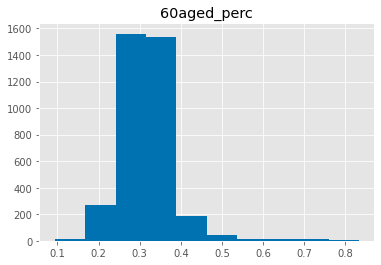

In [ ]:
with plt.style.context('seaborn-colorblind'):  #add this line 
    df_sub.hist(column = '60aged_perc', bins = 10)

In [ ]:
df_sub['60percent_ageg60+'] = df_sub['60aged_perc'].apply(lambda x: 1 if x >= .6 else 0)
df_sub.head()

,60_over,voter,60aged_perc,60percent_ageg60+
PEC_num,,,,
01.01.01,474,1389,0.3,0
01.01.02,431,1276,0.3,0
01.01.03,508,1485,0.3,0
01.01.04,393,1194,0.3,0
01.01.05,521,1597,0.3,0


In [ ]:
df_sub.sum(axis = 0)

60_over             1082916.0
voter               3501931.0
60aged_perc            1163.3
60percent_ageg60+        31.0
dtype: float64

31 PEC out of 3656 are comprised of 60% or more voters who are aged 60 and over 

<a name="sumhigh"></a>
# Summarizing at a higher level

### Let's count how many entries or voters (non blank) are in each pec

In [ ]:
pscounts = df.groupby('PEC_num').size(); pscounts

PEC_num
01.01.01     1389
01.01.02     1276
01.01.03     1485
01.01.04     1194
01.01.05     1597
             ... 
30.84.50      350
30.84.51      294
30.84.52      188
30.84.53      261
30.84.54      320
Length: 3656, dtype: int64

Look at the shape of our data

In [ ]:
pscounts.shape

(3656,)

Uh oh. What we created is actually a series (all in one column) but we want to make it a dataframe so we can label the columns. So we convert it the series to a dataframe (an we reset the dataframe index).

In [ ]:
pscounts = pscounts.to_frame().reset_index()

Let's confirm it's 2 columns:

In [ ]:
pscounts.shape

(3656, 2)

Yay, Let's look at the names of our columns

In [ ]:
pscounts.columns

Index(['PEC_num', 0], dtype='object')

Re-name the second column (currently labeled 0) to 'numVoters'

In [ ]:
pscounts.rename(columns={0: 'numVoters'}, inplace=True)

In [ ]:
#check it
pscounts.columns

Index(['PEC_num', 'numVoters'], dtype='object')

Let's get a quick view of the summary statistics for the numerical data (i.e., numVoters) in this polling station level dataset:

In [ ]:
pscounts.describe()

,numVoters
count,3656.0
mean,957.9
std,443.8
min,21.0
25%,593.0
50%,1043.0
75%,1331.0
max,2846.0


<a name="histo"></a>
# Make a histogram of Voters (Polling station dataset)

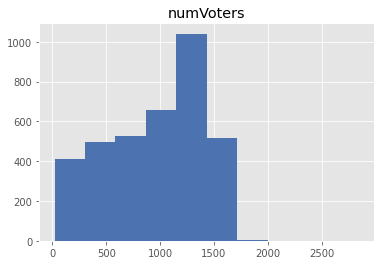

In [ ]:
pscounts.hist('numVoters');

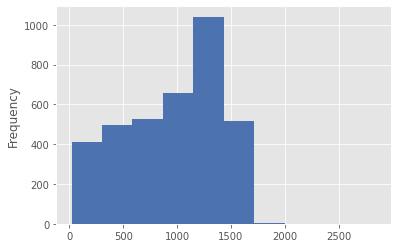

In [ ]:
pscounts["numVoters"].plot(kind="hist")

<a name="save"></a>
# Save the polling station level dataset

Save this polling station-level dataset to a csv file that is tab separated and with utf-8 encoding

In [ ]:
pscounts.to_csv('PollingStation_VLcounts_tabsep.csv', sep='\t', encoding='utf-8', index=False)

Or we could save it to a csv file that is (by default) comma separated by not including the sep='\t' option

In [ ]:
pscounts.to_csv('PollingStation_VLcounts_comma.csv', encoding='utf-8', index=False)

(Colab)  The Colab environment does NOT save datasets once you disconnect or close this notebook. We can download the files we created to our local computer. Running the code below will download both files to your default download folder (if you are using Chrome).

In [ ]:
from google.colab import files
downloaded = files.download('/content/PollingStation_VLcounts_tabsep.csv')
alsodownloaded = files.download('/content/PollingStation_VLcounts_comma.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This is the end of this notebook. 